# Chapter 4 - Sources of Data

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import matplotlib.pyplot as plt

### Returns in Python 

#### Slicing

In [2]:
price = np.array([10, 10.3, 10,4,10,2])
p_return = (price[1:] - price[:-1]) / price[:-1]
p_return

array([ 0.03      , -0.02912621, -0.6       ,  1.5       , -0.8       ])

#### Slicing with SciPy'random functions

In [3]:
sp.random.seed(123)
#random_sample(n) generates n random floats between 0 and 1, * 15 is to make them larger
price = sp.random.random_sample(10)*15
#Transform these into returns
sci_ret = price[1:]/price[:-1] -1 
sci_ret

array([-0.58915722, -0.20719934,  1.43028978,  0.3050058 , -0.4119184 ,
        1.31800809, -0.30173864, -0.29773508, -0.18467143])

$ return(sort) = \begin{cases} \frac{price[1:]}{price[:-1]} - 1, & \mbox{if } sort\mbox{ is oldest to newest} \\ \frac{price[:-1]}{price[1:]} - 1, & \mbox{if } sort\mbox{ is newest to oldest} \end{cases}$

In [4]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2015, 11, 9)
price = web.DataReader("IBM", "quandl", start, end)
price[:6]

ConnectionError: HTTPSConnectionPool(host='www.quandl.com', port=443): Max retries exceeded with url: /api/v3/datasets/WIKI/IBM.csv?start_date=2015-01-01&end_date=2015-11-09&order=asc (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x119bb7a90>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))


$ .values = \begin{cases} price[1:].values, & \mbox{if } sort \mbox{ is oldest to newest}\\ price[:-1].values, & \mbox{if } sort \mbox{ is newest to oldest}\end{cases} $

In [ ]:
#Using the .values is needed else an array of zeros will appear instead
ret = (price.AdjClose[:-1].values - price.AdjClose[1:]) / price.AdjClose[1:]
ret.tail()


$ manually = \begin{cases} \frac{price[0] - price[1]}{price[1]}, & \mbox{if } sort \mbox{ is newest to oldest}\\ \frac{price[1] - price[0]}{price[0}, & \mbox{if } sort \mbox{ is oldest to newest} \end{cases} $

In [ ]:
#Verify manually
(price.AdjClose[0] - price.AdjClose[1]) / (price.AdjClose[1])

### Get daily data for IBM, get daily returns and run statistical tests

In [ ]:
#Get the daily data for IBM
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2015, 12,31)
ibm = web.DataReader("IBM", "quandl", start, end)

#Get return
ret_ibm = (ibm.AdjClose[:-1].values - ibm.AdjClose[1:]) / (ibm.AdjClose[1:])
#Get mean
mean_ibm = np.mean(ret_ibm)
mean_ibm

### Is the daily mean statistically significant? - 2 SIDED TEST FOR 1 GROUP OF SCORES

#### Use ttest_1samp( ) in the stats model to test if its different from 0

In [11]:
from scipy import stats

't-test result: T-Value and P-Value:'
stats.ttest_1samp(ret_ibm,0)

Ttest_1sampResult(statistic=0.3085614605392206, pvalue=0.7577063103370381)

##### Conclusion: $E[IBM_{2011 - 2015}] = 0 $

#### This is a 2 sided test for $H_0: \mu = 0$ that is expected mean of a sample of independent observations a, is equal to the given population mean, popmean

### Test the equal mean for 2 stocks: IBM vs. MSFT:

In [12]:
#Get ticker info
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2016, 12, 9)

def ret_stock(ticker, start, end):
    stock = web.DataReader(ticker, "quandl", start, end)
    ret = (stock.AdjClose[:-1].values - stock.AdjClose[1:]) / stock.AdjClose[1:]
    return ret

msft = ret_stock("MSFT", start, end)
ibm = ret_stock("IBM", start, end)

#GET THE MEANS
ibm.mean()*100, msft.mean()*100

(0.0021964574314371, 0.10395458646289257)

In [13]:
"""Proceed with the t-test"""
stats.ttest_ind(ibm, msft)

Ttest_indResult(statistic=-1.6527470987306, pvalue=0.09854056558466835)

##  Returns

### Percentage Return (R):

$ R = \frac{p_2 - p_1}{p_1} $

### Log Return:

$ R^{log} = ln\frac{p_2}{p_1} $

### The Relationship between the Two:

$ R^{log} = ln(R + 1) $

$ R = e^{R^{log}} - 1 $

### The log return of a longer period is the summation of a short period:

$ R^{log}_{long period} = \sum R^{log}_{short period}$

$ R^{log}_{annual} = \sum R^{log}_{monthly} = \sum R^{log}_{daily}$

## Convert daily returns to monthly returns:

In [14]:
ticker = "IBM"
start = datetime.datetime(2015, 1 ,1)
end = datetime.datetime(2015, 12, 31)
ibm = web.DataReader("IBM", "quandl", start, end)
ibm[:5]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,139.07,139.100,137.57,137.62,3462037.0,0.0,1.0,128.978617,129.006440,127.587462,127.633834,3462037.0
2015-12-30,139.58,140.440,139.22,139.34,2989367.0,0.0,1.0,129.451610,130.249205,129.117733,129.229025,2989367.0
2015-12-29,138.25,140.060,138.20,139.78,3943691.0,0.0,1.0,128.218119,129.896779,128.171747,129.637097,3943691.0
2015-12-28,137.74,138.045,136.54,137.61,3143412.0,0.0,1.0,127.745126,128.027994,126.632202,127.624559,3143412.0
2015-12-24,138.43,138.880,138.11,138.25,1495226.0,0.0,1.0,128.385058,128.802404,128.088278,128.218119,1495226.0


### Log Return conversion

##### GOAL: Convert $\sum R^{log}_{daily} \Rightarrow R^{log}_{monthly} $ so as to feed the monthly to form the yearly

a) - $ \sum R^{log}_{daily} = [ days ] \Rightarrow R^{log}_{monthly} = Single Value$

b) - $ \forall $ elements $ \in(0,size(\sum R^{log}_{daily}) $ $ : YYYY/MM/DD \Rightarrow YYYY/MM \Rightarrow [ days ] $

c) - Create a DataFrame: index = $ R^{log}.values$ date = YYYY/MM, columns = monthly label

d) - Group the DataFrame by the index = date and Group by: $ \forall i : \sum days[i] \Rightarrow $ group same days into one 

In [15]:
#Get the log return
ibm_logret = np.log(ibm.AdjClose[:-1] / ibm.AdjClose[1:].values)
ibm_logret

Date
2015-12-31   -0.012421
2015-12-30   -0.003153
2015-12-29    0.015646
2015-12-28   -0.004640
2015-12-24   -0.002095
2015-12-23    0.004413
2015-12-22    0.017775
2015-12-21    0.004438
2015-12-18   -0.013621
2015-12-17   -0.018404
2015-12-16    0.010827
2015-12-15    0.013591
2015-12-14    0.010056
2015-12-11   -0.016289
2015-12-10    0.001244
2015-12-09   -0.010486
2015-12-08   -0.010807
2015-12-07   -0.006286
2015-12-04    0.010811
2015-12-03   -0.005599
2015-12-02   -0.011246
2015-12-01    0.013253
2015-11-30    0.006909
2015-11-27    0.003328
2015-11-25   -0.004338
2015-11-24    0.001011
2015-11-23   -0.000289
2015-11-20    0.012789
2015-11-19    0.006751
2015-11-18    0.014835
                ...   
2015-02-17    0.003485
2015-02-13    0.011790
2015-02-12    0.002021
2015-02-11   -0.002273
2015-02-10    0.017881
2015-02-09   -0.006209
2015-02-06   -0.000570
2015-02-05    0.006034
2015-02-04   -0.009574
2015-02-03    0.024336
2015-02-02    0.008767
2015-01-30   -0.014055
2015-0

In [19]:
#Initialize the date array with a for loop from 0 to the how many log returns we have

d0 = ibm.index
date = []
for i in range(0, np.size(ibm_logret)):
    date.append(" - ".join([d0[i].strftime("%Y"), d0[i].strftime("%m")]))

y = pd.DataFrame(ibm_logret.values, date, columns = ["retMonthly"])

retMonthly = y.groupby(y.index).sum
retMonthly()


,retMonthly
1980 - 01,0.093417
1980 - 02,-0.077544
1980 - 03,-0.130162
1980 - 04,-0.015728
1980 - 05,0.009070
1980 - 06,0.059073
1980 - 07,0.104935
1980 - 08,0.003824
1980 - 09,-0.021294
1980 - 10,0.038249


### Convert daily into annual returns

In [18]:
start = datetime.datetime(1980,1,1)
end = datetime.datetime(2015,12,31)

ibm = web.DataReader("IBM", "quandl", start, end)
ibm_logret = np.log((ibm.AdjClose[:-1] / ibm.AdjClose[1:].values))

date = []
d0 = ibm.index

for i in range(0, np.size(ibm_logret)):
    date.append(d0[i].strftime("%Y"))

y = pd.DataFrame(ibm_logret.values, date, columns = ["Annual Returns"])

# we use exponential sum grouping minus 1
ann_ret = np.exp(y.groupby(y.index).sum()) - 1
ann_ret
    

,Annual Returns
1980,0.085920
1981,-0.161927
1982,0.692159
1983,0.267532
1984,0.009180
1985,0.262995
1986,-0.228296
1987,-0.028944
1988,0.095838
1989,-0.194349


##### sp.stats.bartlett(x,y) is used to test:
                
$ h_0:\sigma^2_{stock - a} \neq \sigma^2_{stock - b} vs. h_1:\sigma^2_{stock - a} = \sigma^2_{stock - b} $

##### it prints out the T-stat and P-value of the test

# Visualization 

## a - Return Distributions vs. Normal Distribution

### Histogram: Returns [n, bins, patches]

##### - n : array or list of arrays:

     The values of the histogram bins. See normed or density and weights for a description of the possible semantics. If input x is an array, then this is an array of length nbins. If input is a sequence arrays [data1, data2,..], then this is a list of arrays with the values of the histograms for each of the arrays in the same order.


##### - bins : array:

    The edges of the bins. Length nbins + 1 (nbins left edges and right edge of last bin). Always a single array even when multiple data sets are passed in.
    

##### - patches : list or list of lists:

    Silent list of individual patches used to create the histogram or list of such list if multiple input datasets.

Other Parameters:	
**kwargs : Patch properties


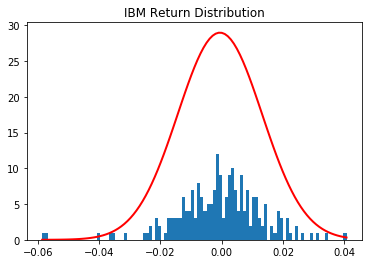

In [252]:
import matplotlib.mlab as mlab
#get data
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2015,11,9)
ibm = web.DataReader("IBM", "quandl", start, end)
ibm_ret = (ibm.AdjClose[:-1].values - ibm.AdjClose[1:]) / (ibm.AdjClose[1:])

#Return Histogram
[n,bins,patches] = plt.hist(ibm_ret, 100)

#declare the stats
mu = np.mean(ibm_ret)
sigma = np.std(ibm_ret)

#Plot the normal distrib
norm = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, norm, color="red", lw=2)
plt.title("IBM Return Distribution")
plt.show()

## b - Candle-Sticks

In [275]:
from matplotlib.dates import DateFormatter, WeekdayLocator, HourLocator, DayLocator, MonthLocator, MONDAY
from matplotlib.finance import candlestick_ohlc, plot_day_summary_ohlc

###### Locator Functions

Locates the days of the week to use as labels for the axis.
    
##### Major vs. Minor Ticks:

The tick marks along the coordinate axes consist of “major” tick marks bearing labels and of “minor” tick marks without labels.

TicksBetween sets the number of minor ticks between each pair of major ticks for all coordinate axes.

With XTicksBetween etc., the number of minor ticks may be set separately for each single coordinate axis.

Per default between every two major tick marks one minor tick mark is rendered. Via TicksBetween this number can be increased or set to zero. In contrast to major tick marks, minor tick marks are never labelled.

Minor tick marks are rendered always with half the length of the major tick marks

#### Formatter Functions

Use strftime() format strings as in $Weeks = ("$%b %d$) $ / $Days = ($%d$)$

### Candlesticks Algorithm:

1) Convert the datetime object to a matplotlib object

- Apply to the datetime date a function that converts the datetime to number saving it in a new column:

      - quotes["new_date_col"] = quotes["Dates"].apply(lambda date: mdates.date2num(date.to_pydatetime()))
    
- append as tuple all the values in ["new_date_col"] and OHLC
    
      - quotes_as tuple = [tuple(x) for x in quotes[[""new_date_col", "Open", "High", "Low", "Close"]].values]
      
      
      
2) Get the major and minor ticks based on where you want to start and format them accordingly:

- Locator Functions:

      - mondays = WeekdayLocator(MONDAY), alldays = DayLocator()
    
- Formatter Functions:
    
      - quotes_as tuple = [tuple(x) for x in quotes[[""new_date_col", "Open", "High", "Low", "Close"]].values]
      
      

3) Setting up the axes for the locators and formatters:

- Locator Functions:

        ax.xaxis.set_major_locator(mondays) #set to the major tick
        ax.xaxis.set_minor_locator(alldays) #set to minor tick

- Formatter Functions:

        ax.xaxis.set_major_formatter(weekFormatter)
        ax.xaxis.set_minor_formatter(dayFormatter)
    

4) Plot:

- plot with axis and data:

        plot_day_summary_ohlc(ax, subset_as_tuples, ticksize=3)
        candlestick_ohlc(ax, subset_as_tuples, width=0.6)

Text(0.5,1,'Candlesticks for IBM from 10/20/2013 to 11/10/2013')

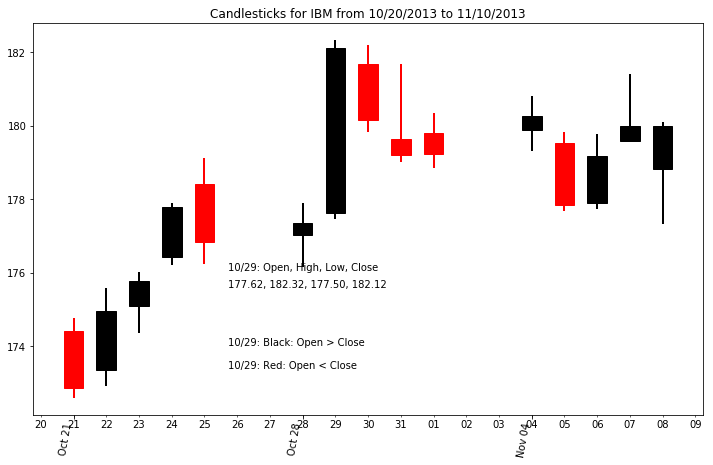

In [273]:
import matplotlib.dates as mdates

"""Accessor Functions"""
date1 = datetime.datetime(2013,10,20)
date2 = datetime.datetime(2013,11,10)
ticker = "IBM"
quotes = web.DataReader(ticker, "quandl", date1, date2).reset_index()
#Check:
if len(quotes) == 0:
    raise SystemExit

"""Convert datetime object to matplotlib object"""
quotes["date_num"] = quotes["Date"].apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset_as_tuples = [tuple(x) for x in quotes[["date_num", "Open", "High", "Low", "Close"]].values]

"""Locator Functions"""
#Major Ticks on mondays
mondays = WeekdayLocator(MONDAY)
#Minor Ticks on the days
alldays = DayLocator()

"""Formatter Functions"""
weekFormatter = DateFormatter("%b %d") #jan 12
dayFormatter = DateFormatter("%d") #12

"""Building plots"""
#Initialize Plots with the main figure and the axis:
fig, ax = plt.subplots(figsize=(12,8))
fig.subplots_adjust(bottom=0.2)

#Setting up the axes for the locators and formatters:
ax.xaxis.set_major_locator(mondays) #set to the major tick
ax.xaxis.set_minor_locator(alldays) #set to minor tick
ax.xaxis.set_major_formatter(weekFormatter)
ax.xaxis.set_minor_formatter(dayFormatter)

#Plot the data
plot_day_summary_ohlc(ax, subset_as_tuples, ticksize=3)
candlestick_ohlc(ax, subset_as_tuples, width=0.6)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=80, horizontalalignment="right")

plt.figtext(0.35,0.45, "10/29: Open, High, Low, Close")
plt.figtext(0.35,0.42, "177.62, 182.32, 177.50, 182.12")
plt.figtext(0.35,0.32, "10/29: Black: Open > Close")
plt.figtext(0.35,0.28, "10/29: Red: Open < Close")


plt.title("Candlesticks for IBM from 10/20/2013 to 11/10/2013")

## C - Price Movement

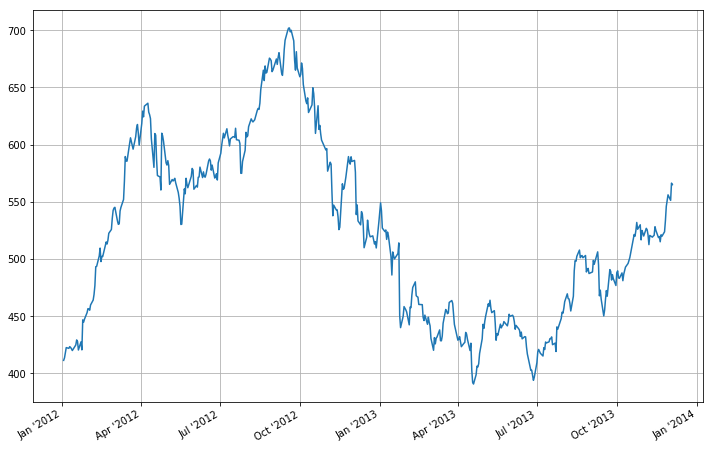

In [326]:
#Initialize the data
ticker = "AAPL"
start = datetime.datetime(2012,1,2)
end = datetime.datetime(2013,12,4)
quotes = web.DataReader(ticker,"quandl", start, end).reset_index()
if len(quotes) == 0:
    raise SystemExit
    
#format the dates in terms of months
months = MonthLocator(range(1,13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%b '%Y")

"""Create an array of dates and Close values instead of resetting the index"""


#Plot
fig,ax = plt.subplots(figsize=(12,8))
ax.plot_date(quotes.Date, quotes.Close, '-')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
ax.grid(True)
fig.autofmt_xdate()
plt.show()

## Stock's Intra-day Movement

In [336]:

sample = quotes[:6]
sample.asfreq("H")[:9]


,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1970-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
sample

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2013-12-04,565.5000,569.1900,560.82,565.000,13493200.0,0.0,1.0,75.167675,75.658159,74.545597,75.101213,94452400.0
1,2013-12-03,558.3000,566.3800,557.68,566.322,16106000.0,0.0,1.0,74.210633,75.284646,74.128221,75.276937,112742000.0
2,2013-12-02,558.0000,564.3299,550.82,551.230,16876600.0,0.0,1.0,74.170756,75.012142,73.216372,73.270871,118136200.0
3,2013-11-29,549.4800,558.3300,547.81,556.070,11361700.0,0.0,1.0,73.038256,74.214620,72.816276,73.914215,79531900.0
4,2013-11-27,536.3098,546.0000,533.40,545.960,12980300.0,0.0,1.0,71.287640,72.575686,70.900862,72.570369,90862100.0
5,2013-11-26,524.1200,536.1400,524.00,533.400,14335100.0,0.0,1.0,69.667342,71.265070,69.651391,70.900862,100345700.0
